In [2]:
from pathlib import Path

import warm_pixels as wp

# We assume our data is in a directory parallel to warm_pixels called 'hst_acs_datasets'
data_directory = Path.cwd().parent.parent / "hst_acs_datasets"
dataset_directory = data_directory / "04_2017"
image_filename = dataset_directory / "jd5h08qoq_raw.fits"

# An image can be created by passing a filename
image = wp.Image(image_filename)

# We can easily extract a particular quadrant from the image
image_quadrant = image.quadrant("A")

# And plot warm pixels for that image
wp.plot.warm_pixels(image_quadrant)

ModuleNotFoundError: No module named 'wrapper'

In [ ]:
# A dataset can be created by passing directory
dataset = wp.Dataset(dataset_directory)

# Datasets contain images
print(len(dataset))
image = dataset[0]
wp.plot.warm_pixels(
    image.quadrant("B")
)

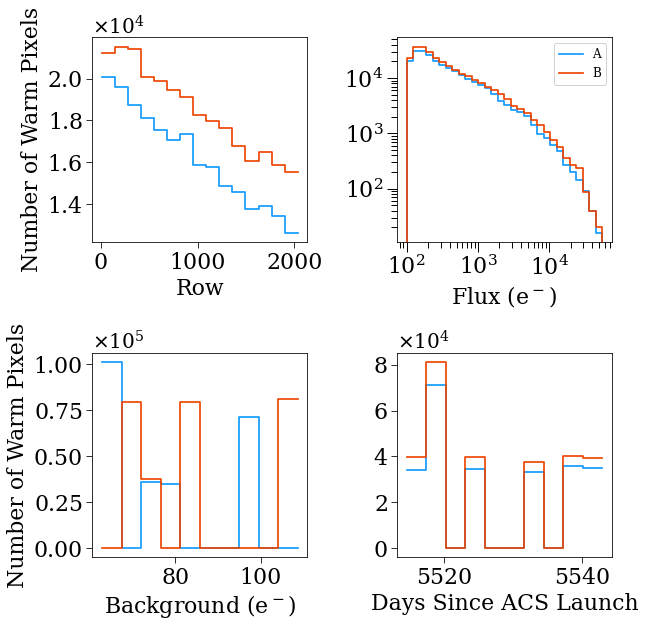

In [3]:
# We can also take a quadrant for a dataset
dataset_quadrants = [
    dataset.quadrant("A"),
    dataset.quadrant("B"),
]

# And then plot the distribution of warm pixels
wp.plot.warm_pixel_distributions(
    dataset_quadrants
)

Performing global fit
2.4096324580889354 0.025187685842138458 exponentials
Performing individual fits:

ArCTIC v7.0.1 
------ 
Parallel: 1 column(s) [0 to 1], 228 row(s) [0 to 228] 
  express = 5 
  ROE type = 0, n_steps = 1 
    dwell_times = [1]
    empty_traps_between_columns = 1 
    empty_traps_for_first_transfers = 0 
  CCD n_phases = 1 
    full_well_depth = 84700, well_notch_depth = 0, well_fill_power = 0.478 
  Instant-capture traps n = 3 
    density = 0.17, release_timescale = 0.74 
    density = 0.45, release_timescale = 7.7 
    density = 0.38, release_timescale = 37 
Wall-clock time elapsed: 6.4e-05 s 

ArCTIC v7.0.1 
------ 
Parallel: 1 column(s) [0 to 1], 228 row(s) [0 to 228] 
  express = 5 
  ROE type = 0, n_steps = 1 
    dwell_times = [1]
    empty_traps_between_columns = 1 
    empty_traps_for_first_transfers = 0 
  CCD n_phases = 1 
    full_well_depth = 84700, well_notch_depth = 0, well_fill_power = 0.478 
  Instant-capture traps n = 3 
    density = 0.17, releas

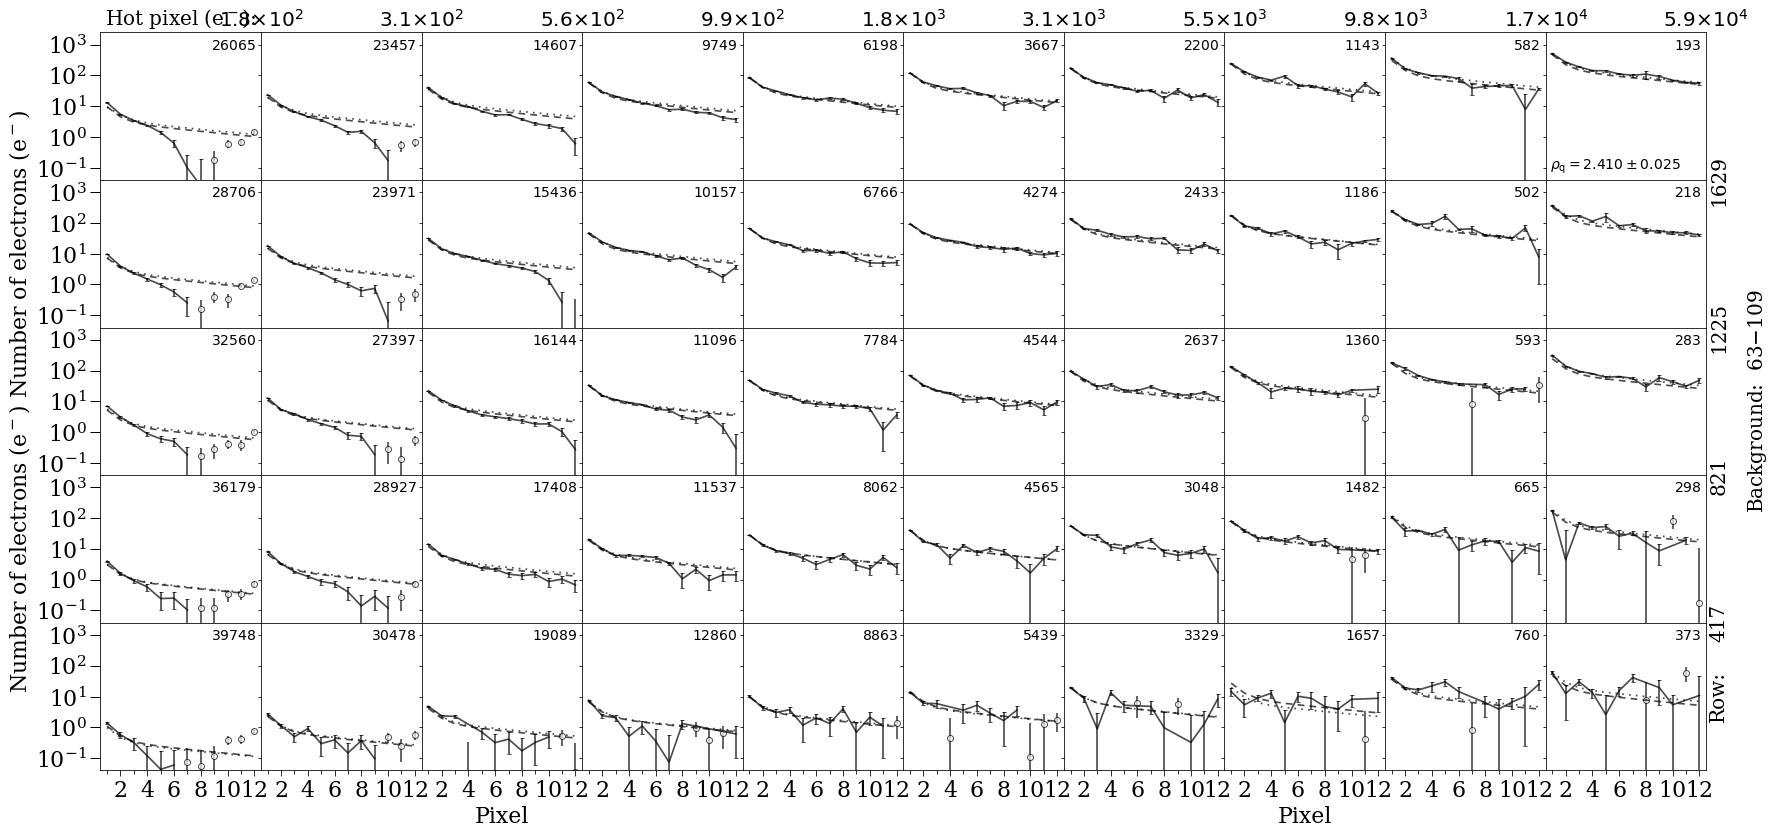

In [4]:
# Groups of quadrants can be obtained for a dataset
group = dataset.group("AB")

# Stacked trails may be plotted for a group
wp.plot.stacked_trails(group)

Fit total trap densities... "10_2017" (2 of 2)            
Fit total trap densities... "10_2017" (2 of 2)            


/Users/richardhayes/anaconda3/envs/warm_pixels/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/richardhayes/anaconda3/envs/warm_pixels/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


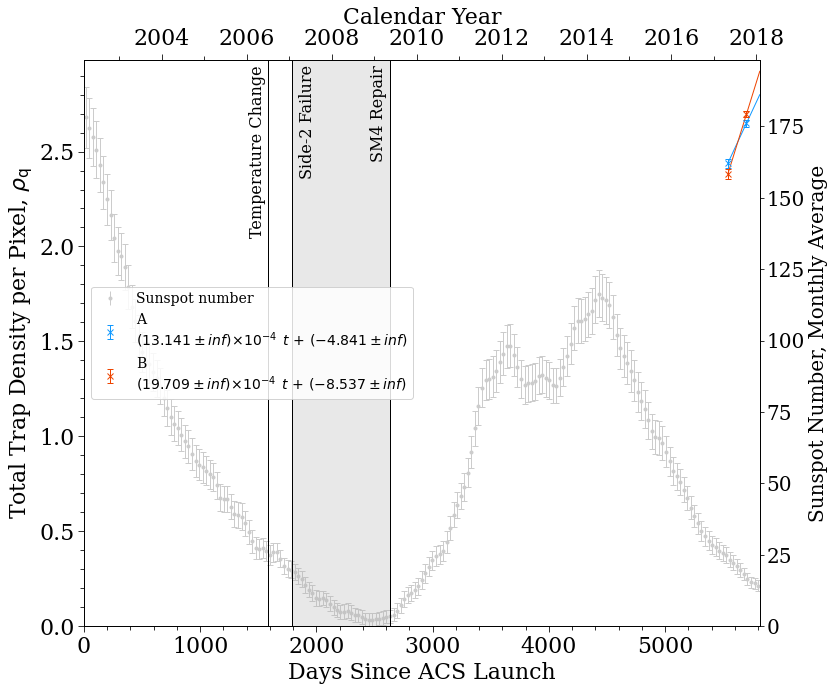

In [5]:
# A WarmPixels object can be created to encapsulate multiple datasets

dataset_2 = wp.Dataset(
    data_directory / "10_2017"
)

warm_pixels = wp.WarmPixels(
    datasets=[
        dataset,
        dataset_2,
    ],
    quadrants_string="A_B"
)

# Warm pixels can provide trap densities over time
trap_densities = warm_pixels.all_trap_densities()

# Which can also be plotted
wp.plot.trap_density_evol(trap_densities)